In [1]:
%load_ext autoreload
%autoreload 2

In [77]:
import neurkal

import itertools
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import seaborn as sns

In [78]:
## Plot style setup
rc('mathtext', default='regular')
sns.set_style("whitegrid")
palette = itertools.cycle(sns.color_palette())

In [4]:
def input_act(x, x_i):
    return 3 * (np.exp(2 * (np.cos(x - x_i) - 1)) + 0.01)

In [5]:
# simulation parameters
p = 20  # units in input networks
t_f = 10  # total time
dt = 0.1  # timestep
ts = np.arange(0, t_f, dt)

In [40]:
# dynamical parameters
M = [[1]]  # internal model dynamics
B = [[1]]   # constant "motor" dynamics
Z = [[0.00005]]  # motor noise variance
c = 0.003

In [83]:
# initial state
x0 = 0.25

In [84]:
# conventional Kalman filter initialization
kalman = neurkal.KalmanFilter(M=M, B=B, Z=Z)

In [85]:
# network initialization
state = neurkal.StateDynamics(M, B, Z, x0=x0)
sensory_input = neurkal.PopCode(p, act_func=input_act,
                                dist=np.random.poisson)
# motor_input = popcode.PopCode(p, act_func=input_act, dist=lambda x: x)
kalman_network = neurkal.KalmanBasisNetwork(sensory_inputs=[sensory_input],
                                            motor_inputs=[], M=M, B=[[]])

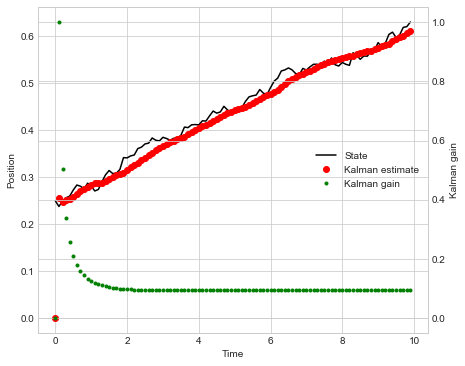

In [86]:
# test kalman filter
sensory_variance = 0.005
states = []
estimates = []
gains = []
c_ = np.array([[c]])
for t in ts:
    estimates.append(kalman.estimate[0, 0])
    gains.append(kalman.gain[0, 0])
    states.append(state.x[0])
    x_s = state.x + np.random.normal(0, sensory_variance)
    kalman.step(c_, x_s, Q=[[sensory_variance]])
    state.update(c_)
fig, ax1 = plt.subplots(figsize=(7, 6))
ax1.set_xlabel("Time")
ax1.set_ylabel("Position")
p1, = ax1.plot(ts, states, 'k-', label="State")
p2, = ax1.plot(ts, estimates, 'ro', label="Kalman estimate")
ax2 = ax1.twinx()
ax2.set_ylabel("Kalman gain")
p3, = ax2.plot(ts, gains, 'g.', label="Kalman gain")

ps = [p1, p2, p3]
labels = [p.get_label() for p in ps]
ax1.legend(ps, labels, loc=7)
plt.show()

In [50]:
for t in np.arange(0, t_f, dt):
    # update input population code with state
    sensory_input(state.x)
    # update activity in basis network implementing Kalman filter
    kalman_network.update(sigma)
    # update real state (+ control noise)
    state.update(c)

ValueError: shapes (20,) and (1,20) not aligned: 20 (dim 0) != 1 (dim 0)

In [37]:
a = np.array([[1e12]])
b = np.array([[0.5]])

In [41]:
print(a,b)

[[1.e+12]] [[0.5]]


In [47]:
a = np.nan
a is np.nan

True